In [3]:
import pandas as pd
data = pd.read_csv('C:/Users/asus/OneDrive/Documents/TUGAS AKHIR/transformeter.csv')
data.head(3)

,humidity,temperature,appap.avg,timestamp
0,19.0,27.5,54.527,11/1/2013
1,0.0,28.2,54.527,11/2/2013
2,8888.0,29.2,54.527,11/3/2013


In [4]:
data['timestamp'] = data['timestamp'].apply(pd.to_datetime)
data['year'] = [i.year for i in data['timestamp']]
data['month'] = [i.month_name()[0:3] for i in data['timestamp']]
data['day'] = [i.day_name()[0:3] for i in data['timestamp']]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import sys
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

x = data[['temperature', 'humidity']]
y = data['appap.avg']




X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, colsample_bytree= 0.6655392754230048, gamma= 4.198875359789924, max_depth= 17, min_child_weight= 1.0, reg_alpha= 57.0, reg_lambda= 0.896332305739873)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6655392754230048, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=4.198875359789924, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=17, max_leaves=0,
              min_child_weight=1.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=1, ...)

In [7]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error


R^2 score: -1.43
MAE score: 18.19
EVS score: 0.00


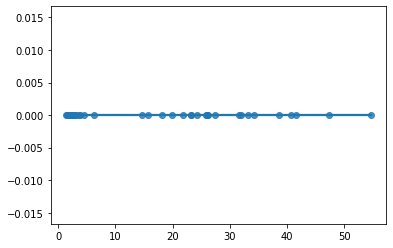

In [9]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [10]:
import pickle
with open('model.pkl','wb') as file:pickle.dump(classifier,file)